In [12]:
import numpy as np
import random
import pandas as pd
import astropy.constants as const
#import scipy.constants as const
import astropy.units as u
import argparse
import sys
import math
import cmath
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import plotly.express as px
import plotly.graph_objects as go

In [ ]:
def drop_time(h, g = 9.8): #h = positional, g = keyword
    t = ((2.0 * h) / g) ** (1/2) #Avoid using a package unless absolutely necessary
    return t

In [ ]:
#If the height is 1 m:
drop_time(10)

Machine Precision

In [ ]:
x = 1.0
eps = 1.0

while not x + eps == x:
    eps = 0.5 * eps
    
print(2 * eps)

In [ ]:
b = 0.1
print(type(b))
print("{:30.20}".format(b))
sys.float_info

In [ ]:
x = 1
y = 1 + (10e-14 * np.sqrt(2))

print(1e14 * (y-x))
print(np.sqrt(2))

In [ ]:
def quad_formula_2(a, b, c):
    #Solution 2
    x_1 = (2 * c) / (-b - np.sqrt(np.square(b) - (4 * a * c)))
    x_2 = (2 * c) / (-b + np.sqrt(np.square(b) - (4 * a * c)))
    
    return x_1, x_2  

In [ ]:
root_1, root_2 = quad_formula_2(3, 6, 1)
print(root_1)
print(root_2)

In [ ]:
def energy(n):
    
    hf = 1
    beta = 0.01
    
    #Initializers
    Z = 0
    E = 0
    
    for i in range(n):
        E_n = hf * (i + 0.5) #Energy level
        Z = Z + np.exp(-beta * E_n) #Z equation (infinite sum)
        E += E_n * np.exp(-beta * E_n) #E equation
        
    avg_E = (E/Z) #Average energy
    
    return avg_E

In [ ]:
#Hundred runs
print(f"4000 runs: {energy(4000)}")

Trapezoid Rule (Integration)

In [ ]:
def func(x): #Integration function
    return x**4 - (2*x) + 1

In [ ]:
def trap_rule(n, a = 0, b = 2, function = func):
    
    #Default paramaters
    #a (lower limit) = 0
    #b (upper limit) = 2
    #function = func
    
    h = (b - a) / n #Height
    s = (0.5 * function(a)) + (0.5 * function(b)) #Sum
    
    for k in range(1, n + 1): #Summation (range stops at n)
        s += function(a + (k * h))
        
    return (h * s) #Multiply height by the sum

In [ ]:
trap_rule(10)

Simpson's Rule

In [ ]:
def OG_simps_rule(n, a = 0, b = 2, function = func):
    
    #Default paramaters
    #a (lower limit) = 0
    #b (upper limit) = 2
    #function = func 
    
    delta_x = (b - a) / n
    
    s = function(a) + function(b)
    
    #Odd integer loop
    for k in range(1, int(n/2) + 1):
        s += 4 * function(a + (((2 * k) - 1) * delta_x))
    
    #Even integer loop
    for k in range(1, int((n/2))):
        s += 2 * function(a + (2 * k * delta_x))
        
    return (delta_x / 3) * s

In [ ]:
OG_simps_rule(1000, function = exp_func) #Ok, so the above method works... how do I adapt it to work for the plots?

In [ ]:
simpsons_rule(10)

In [ ]:
#Trapezoid rule

#10 steps
integral_10_trap = trap_rule(10)

#20 steps
integral_20_trap = trap_rule(20)

error_trap = (1/3) * abs(integral_20_trap - integral_10_trap)

print(f"Error with Trapezoid Rule: {error_trap}")

In [ ]:
#Simpson's rule

#10 steps
integral_10_simp = simpsons_rule(10)

#20 steps
integral_20_simp = simpsons_rule(20)

error_simp = (1/15) * abs(integral_20_simp - integral_10_simp)

print(f"Error with Simpson's Rule: {error_simp}")

Gaussian Quadrature

In [ ]:
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = np.max(np.abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [ ]:
locations, weights = gaussxwab(3, 0, 2)
print(f"Locations: {locations}\n")
print(f"Weights: {weights}")

In [ ]:
def gauss_quad(N, a = 0, b = 2, function = func): #N = Number of steps, a = Lower bound, b = Upper bound
    
    x, w = gaussxwab(N, a, b) #Calculates the x-coordinates for specific points and their weights
    
    s = 0 #Initializer variable for the sum
    
    for k in range(0, N): #Need the range to span the same indices as the x and w lists
        s += w[k] * function(x[k]) #Multiplies the weights by the y-values corresponding to each point's location
        
    return s #Returns the sum

In [ ]:
gauss_quad(3)

Differentiation

In [ ]:
def tan_func(x):
    return 1 + (0.5 * np.tanh(2*x))

In [ ]:
def analytic_deriv(x):
    return 1 / (np.cosh(2 * x) ** 2)

In [ ]:
def central_diff(x, func = tan_func):
    
    h = 10**-5
    
    return (1/h) * (func(x + (0.5 * h)) - func(x - (0.5 * h)))

In [ ]:
diff_range = np.linspace(-2, 2, 100)

fig = plt.figure(figsize = (12, 8))

plt.plot(diff_range, central_diff(diff_range), color = 'blue', label = 'Central Diff Derivative')
plt.plot(diff_range, analytic_deriv(diff_range), color = 'orangered', label = 'Analytic Derivative')

plt.grid()
plt.legend(loc = 'upper left', fontsize = 15)

# HW - Integration

In [ ]:
def exp_func(t):
    return np.e ** (-(t ** 2))

In [ ]:
#Trapezoid rule

def trap_rule(N, a = 0, b = 3, step_size = 0.1, function = exp_func):
    
    """
    This function integrates a given function using the trapezoidal method. This function will integrate over
    bounds of 0 (lower) and 3 (upper), but the user can change the bounds if desired. The given function will
    be iterated over increments of 0.1, which is considered the "step size." Similarly to the bounds, the user
    can change the step size if desired. 
    
    The integral will be iterated N times, where the upper bounds changes from a (0) to b(3) via step_size (0.1)
    increments (ex: ingerate from 0 to 0.1, 0 to 0.2, etc.). With each iteration of the 'for loop,' delta_x will
    change depending on the upper bound, and from there, we can calculate the area of a trapezoidal segment.
    Every time the upper bound changes, the trapezoid's areas will be summed together. After calculating the area,
    it will be added to the trapezoidal method's integration equation, and the answer for the integral will be
    added to an array (sum_trap). x_range and sum_trap will then be returned, so the values can be plotted.
    
    
    Parameters:
        N (int) = Number of times an integral will be calculated (positional argument)
        a (int or float) = Lower bound for the integral (keyword argument)
        b (int or float) = Upper bound for the integral (keyword argument)
        step_size (float) = Incremental change of bounds (keyword argument)
        function (function name) = Function being integrated (keyword argument)
    
    Values:
        area_trap (float) = Area corresponding to each trapezoidal segment
        delta_x (float) = Height of each trapezoidal segment 
        
    
    Returns:
        x_range (np.array) = Array of increments spanning the upper and lower bound, where the increments are
                             dependent on the step size
        sum_trap (list) = List of sums corresponding to each iteration of the integration method
        
    
    """
    
    x_range = np.arange(a, b, step_size)
    
    sum_trap = [] #List of each trapezoid slice's sum
    
    for i in x_range: #Range of summation (range stops at N)
        
        area_trap = 0 #Area of individual trapezoid slice
        
        delta_x = (i - a) / N #Change in x for each iteration of the integration
        
        for j in range(N + 1): #Loops N times
            area_trap += function(a + (j * delta_x)) #Sum for each iteration
            
        lower_end_point = 0.5 * function(a) #Starting value
        upper_end_point = 0.5 * function(i) #Ending value
        
        #Integration equation for trapezoidal method
        integral_trap = delta_x * (lower_end_point + area_trap + upper_end_point)
        
        sum_trap.append(integral_trap) #Appends each trapezoid's sums together
        
    print(f"Trapezoid rule with step size of {step_size} = {integral_trap:.3f}")
        
    return sum_trap, x_range #Multiplies height by the sum

In [ ]:
sum_trap, x_range = trap_rule(1000)

In [ ]:
type(sum_trap[0]) #Calculations check out for this method (Wolfram Alpha agrees for the most part)

In [ ]:
fig = plt.figure(figsize = (12, 8))

plt.xlabel('t', fontsize = 15)
plt.ylabel('Sum', fontsize = 15)
plt.title('Integrating With Trapezoidal Method', fontsize = 20)

plt.scatter(x_range, sum_trap, color = 'blue')

plt.grid()
plt.show()

In [ ]:
#Simpsons Rule

def simpsons_rule(N, a = 0, b = 3, step_size = 0.1, function = exp_func):
    
    """
    This function integrates a given function using the Simpson's rule. This function will integrate over
    bounds of 0 (lower) and 3 (upper), but the user can change the bounds if desired. The given function will
    be iterated over increments of 0.1, which is considered the "step size." Similarly to the bounds, the user
    can change the step size if desired. 
    
    The integral will be iterated N times, where the upper bounds changes from a (0) to b(3) via step_size (0.1)
    increments (ex: ingerate from 0 to 0.1, 0 to 0.2, etc.). With each iteration of the 'for loop,' delta_x will
    change depending on the upper bound, and from there, we can calculate the area under the curve that spans a
    specific bound range. Every time the upper bound changes, the areas will be summed together. After calculating
    the area, it will be added to the Simpson method's integration equation, and the answer for the integral will
    be added to an array (sum_simp). x_range and sum_simp will then be returned, so the values can be plotted.
    
    Parameters:
        N (int) = Number of times an integral will be calculated (positional argument)
        a (int or float) = Lower bound for the integral (keyword argument)
        b (int or float) = Upper bound for the integral (keyword argument)
        step_size (float) = Incremental change of bounds (keyword argument)
        function (function name) = Function being integrated (keyword argument)
    
    Values:
        area_simp (float) = Area under the curve corresponding to different bound ranges
    
    Returns:
        x_range (np.array) = Array of increments spanning the upper and lower bound, where the increments are
                             dependent on the step size
        sum_simp (list) = List of sums corresponding to each iteration of the integration method
    
    """
    
    x_range = np.arange(a, b, step_size)
    
    sum_simp = [] #List of each trapezoid slice's sum
        
    for i in x_range:
        
        area_simp = 0 #Area under the curve of a specific integration bound
        
        delta_x = (i - a) / N #Change in x for each iteration of the integration
        
        lower_end_point = function(a) #Stays constant
        upper_end_point = function(i) #Upper bound incrementally increases by the step_size value every iteration
        
        #Odd integer loop
        for k in range(1, int(N/2) + 1):
            area_simp += 4 * function(a + (((2 * k) - 1) * delta_x))
    
        #Even integer loop
        for k in range(1, int((N/2))):
            area_simp += 2 * function(a + (2 * k * delta_x))
                
        integral_simp = (delta_x/3) * (lower_end_point + area_simp + upper_end_point) #Simpson's equation
        
        sum_simp.append(integral_simp) #Appending each set of bounds' integrations to a list    
        
    #print(f"Simpson's rule with step size of {step_size} = {integral_simp:.3f}")
        
    return x_range, sum_simp, integral_simp

In [ ]:
x_range, sum_simp, integral_simp  = simpsons_rule(100) #This method isn't working very well

sum_simp

In [ ]:
fig = plt.figure(figsize = (12, 8))

plt.xlabel('t', fontsize = 15)
plt.ylabel('Sum', fontsize = 15)
plt.title('Integrating With Simpsons Method', fontsize = 20)

plt.plot(x_range, sum_simp, color = 'orangered')

plt.grid()
plt.show()

In [ ]:
#Comparing both methods

fig = plt.figure(figsize = (12, 8))

plt.xlabel('t', fontsize = 15)
plt.ylabel('Sum', fontsize = 15)
plt.title('Integrating With Simpsons Method', fontsize = 20)

plt.plot(x_range, sum_simp, color = 'orangered', linewidth = 3, label = 'Simpsons')
plt.plot(x_range, sum_trap, color = 'blue', linewidth = 2, linestyle = '--', label = 'Trapezoidal')

plt.grid()
plt.legend(loc = 'lower right', fontsize = 15)
plt.show()

In [ ]:
def plotting_integral(x_range, sum_list):
    
    fig = plt.figure(figsize = (12, 8))

    plt.xlabel('t', fontsize = 15)
    plt.ylabel('Sum', fontsize = 15)

    if sum_list == sum_simp:
        plt.title('Integrating With Simpsons Method', fontsize = 20)
        plt.plot(x_range, sum_list, color = 'orangered', label = 'Simpsons')
        
    if sum_list == sum_trap:
        plt.title('Integrating With Trapezoidal Method', fontsize = 20)
        plt.plot(x_range, sum_trap, color = 'blue', label = 'Trapezoidal')

    plt.grid()
    plt.legend(loc = 'lower right', fontsize = 15)
    plt.show()

In [ ]:
plotting_integral(x_range, sum_simp)

In [ ]:
sum_trap[-1]

In [ ]:
def plotting_integral(x_range, sum_list, method_type):
    
    fig = plt.figure(figsize = (12, 8))

    plt.xlabel('t', fontsize = 15)
    plt.ylabel('Sum', fontsize = 15)

    #if sum_list == sum_simp:
        #plt.title('Integrating With Simpsons Method', fontsize = 20)
        #plt.plot(x_range, sum_list, color = 'orangered', label = 'Simpsons')
        
    if method_type == 'trapezoidal':
        plt.title('Integrating With Trapezoidal Method', fontsize = 20)
        plt.plot(x_range, sum_list, color = 'blue', label = 'Trapezoidal')
        
    if method_type == 'both':
        plt.title('Integrating With Trapezoid and Simpsons Method', fontsize = 20)

        plt.plot(x_range, sum_simp, color = 'orangered', linewidth = 3, label = 'Simpsons')
        plt.plot(x_range, sum_trap, color = 'blue', linewidth = 2, linestyle = '--', label = 'Trapezoidal')


    plt.grid()
    plt.legend(loc = 'lower right', fontsize = 15)
    plt.show()

In [ ]:
plotting_integral(x_range, sum_trap, 'trapezoidal')

Relaxation method

In [ ]:
def relax_func(x, c):
    x = 1 - (np.exp(-c * x))
    return x

In [ ]:
def relax_method(x_guess, c = 2, func = relax_func):

    num_iterations = 0 #Increases by 1 for each iteration
    
    answer = 0 #Initial value
    
    max_iterations = 100000
    
    while x_guess != answer or num_iterations < max_iterations: 
        answer = relax_func(x_guess, c)
        x_guess = answer #New guess value = answer from last calculation
        num_iterations += 1
        
    return answer

In [ ]:
answer = relax_method(1)

answer

In [ ]:
c_range = np.arange(0, 3, 0.1)

answer_c_list = []

for c_val in c_range: #Go through the c_range OUTSIDE of the function - answers converge for each step
    answer = relax_method(1, c = c_val)
    answer_c_list.append(answer)

In [ ]:
fig = plt.figure(figsize = (12, 8))

plt.xlabel('c', fontsize = 15)
plt.ylabel('x', fontsize = 15)
plt.title('Relaxation Method', fontsize = 20)

plt.scatter(c_range, answer_c_list, color = 'blue')
plt.grid()
plt.show()

Newton's Method

In [ ]:
def legendre_polynomial(x):
    const_list = [924, 2772, 3150, 1680, 420, 42, 1]
    P = (const_list[0] * (x ** 6)) - (const_list[1] * (x ** 5)) + (const_list[2] * (x ** 4)) - (const_list[3] * (x ** 3)) + (const_list[4] * (x ** 2)) - (const_list[5] * x) + const_list[6]
    return P

In [ ]:
def deriv_legendre(x):
    const_list = [924, 2772, 3150, 1680, 420, 42, 1]
    P_prime = (6 * const_list[0] * (x ** 5)) - (5 * const_list[1] * (x ** 4)) + (4 * const_list[2] * (x ** 3)) - (3 * const_list[3] * (x ** 2)) + (2 * const_list[4] * x) - const_list[5]
    return P_prime

In [ ]:
x_range = np.arange(0, 1, 0.01)

P_vals = []
P_prime_vals = []

for x in x_range:
    P_vals.append(legendre_polynomial(x))
    P_prime_vals.append(deriv_legendre(x))

In [ ]:
fig = plt.figure(figsize = (12, 8))

plt.xlabel('x', fontsize = 15)
plt.ylabel('P(x)', fontsize = 15)
plt.title('Plotting Legendre Polynomial', fontsize = 20)

plt.xlim(0, 1)
plt.ylim(-1, 1)

plt.plot(x_range, P_vals, color = 'blue', linewidth = 3, label = 'Legendre')
plt.plot(x_range, P_prime_vals, color = 'orangered', linewidth = 3, label = 'Derivative')

plt.axhline(y = 0, color = 'black', linestyle = '--')

plt.legend(loc = 'upper right', fontsize = 15)

plt.grid()
plt.show()

In [ ]:
root_guesses = [0.03, 0.15, 0.38, 0.62, 0.85, 0.93]

def newtons_method(x_1, f = legendre_polynomial, f_prime = deriv_legendre, tol = 1e-10, max_iter = 100000):
    num_iter = 0
    
    x_2 = x_1 - (f(x_1) / f_prime(x_1)) #x_2 isn't dependent on the second guess. It's dependent on P(x_1) and its derivative.
    
    while abs(x_2 - x_1) > tol: #Make sure the derivative isn't 0, or the function will fail
        num_iter += 1
        x_1 = x_2 #x_1 keeps changing until a root is found
        x_2 = x_1 - (f(x_1) / f_prime(x_1))
        
        if num_iter > max_iter: #Will be an infinite loop if we don't define the max iterations
            print(f"Did not converge after {max_iter} iterations.")
            return None #Won't return any values
    return x_2

In [ ]:
roots = []

for guess in root_guesses:
    answer = newtons_method(guess)
    
    if answer is not None:
        roots.append(answer)

In [ ]:
roots

In [ ]:
fig = plt.figure(figsize = (12, 8))

plt.xlabel('x', fontsize = 15)
plt.ylabel('P(x)', fontsize = 15)
plt.title('Plotting Legendre Polynomial', fontsize = 20)

plt.xlim(0, 1)
plt.ylim(-1, 1)

plt.plot(x_range, P_vals, color = 'orangered', linewidth = 3, label = 'Legendre')

plt.scatter(roots, np.zeros(6), color = 'blue', s = 50, label = 'Roots with Newtons Method')

plt.scatter(root_guesses, np.zeros(6), color = 'mediumspringgreen', s = 50, label = 'Guesses')

plt.axhline(y = 0, color = 'black', linestyle = '--')

plt.legend(loc = 'upper right', fontsize = 15)

plt.grid()
plt.show()

In [ ]:
#Let's try the secant method now (maybe I shouldn't worry about the guesses right now)

def secant_method(x_1, x_2, f = legendre_polynomial, tol = 1e-10, max_iter = 100000):#Method isn't working
    #For the secant method, we're using pairs of points to find the roots
    
    num_iter = 0
    
    x_3 = x_2  - (f(x_2) * x_2  - ((x_2 - x_1) / (f(x_2) - f(x_1))))
    
    while abs(x_2 - x_3) > tol:
        num_iter += 1
        
        x_1 = x_2
        x_2 = x_3
        
        x_3 = x_2  - (f(x_2) * ((x_2 - x_1) / (f(x_2) - f(x_1))))
        
        if num_iter > max_iter: #Will be an infinite loop if we don't define the max iterations
            print(f"Did not converge after {max_iter} iterations.")
            return None #Won't return any values
    return x_3
        

In [ ]:
sec_roots = []


for i in range(len(root_guesses)):
    if i < len(root_guesses) - 1:
        answer = secant_method(root_guesses[i], root_guesses[i + 1])
        
        if answer is not None:
            sec_roots.append(answer)
    
    #if answer is not None:
        #sec_roots.append(answer)

In [ ]:
sec_roots

In [ ]:
fig = plt.figure(figsize = (12, 8))

plt.xlabel('x', fontsize = 15)
plt.ylabel('P(x)', fontsize = 15)
plt.title('Plotting Legendre Polynomial', fontsize = 20)

plt.xlim(0, 1)
plt.ylim(-1, 1)

plt.plot(x_range, P_vals, color = 'orangered', linewidth = 3, label = 'Legendre')

plt.scatter(sec_roots, np.zeros(5), color = 'blue', s = 50, label = 'Roots from Secant Method')

plt.scatter(root_guesses, np.zeros(6), color = 'mediumspringgreen', s = 50, label = 'Guesses')

plt.axhline(y = 0, color = 'black', linestyle = '--')

plt.legend(loc = 'upper right', fontsize = 15)

plt.grid()
plt.show()

# HW - Lagrange Point

In [ ]:
def lagrange(r):
    G = const.G
    M = const.M_earth
    m = 7.348e22 * u.kg
    R = 3.844e8 * u.m
    omega = 2.662e-6 * (1/u.s)
    
    L = ((G * M) / np.square(r * u.m)) - ((G * m) / np.square(R - (r * u.m))) - (np.square(omega) * (r * u.m))
    
    return L

In [ ]:
x_range = np.linspace(1e7, 1e9, 1000)
y_vals = []

for x in x_range:
    y_vals.append(lagrange(x).value)

In [ ]:
fig = plt.figure(figsize = (12, 8))

#plt.xlim(3.8e8, 3.9e8)
#plt.ylim(-100, 10)

plt.xlabel('r (m)', fontsize = 15)
plt.ylabel('f(r) (m)', fontsize = 15)

plt.plot(x_range, y_vals, color = 'blue', linewidth = 3)

plt.grid()
plt.show()

Sunspot Example (Exercise 7.2)

In [ ]:
sunspots_file = np.loadtxt('/Users/giovannigollotti/Downloads/sunspots.txt')

months = sunspots_file[:,0]
spots = sunspots_file[:,1]

months

In [ ]:
fig = plt.figure(figsize = (12, 8))

plt.title('Sunspots Since 1749', fontsize = 20)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Number of Sunspots', fontsize = 15)

plt.xlim(0, 500)

plt.plot(months, spots, color = 'blue')

plt.grid()
plt.show()

In [ ]:
def DFT(y): #finds ck values
    
    N = len(y)
    c = np.zeros(N//2 + 1, complex)
    
    for k in range(N//2 + 1):
        for n in range(N):
            c[k] += y[n] * cmath.exp(-2j * cmath.pi * k * n/N)
            
    return c

In [ ]:
coeffs = DFT(spots)

In [ ]:
k_range = np.arange(1, len(coeffs) - 1, 1)

k_range

In [ ]:
fig = plt.figure(figsize = (12, 8))

plt.title('DFT of Sunspots Since 1749', fontsize = 20)
plt.xlabel('k', fontsize = 15)
plt.ylabel(r'$c_k^2$', fontsize = 15)

plt.xlim(0, 200)

plt.plot(k_range, coeffs[1:-1], color = 'blue')

plt.grid()
plt.show()

In [ ]:
#Estimate from first plot = 200 months
#Estimate from periodogram: k = 25

def inverse_DFT(y, c_k, k):
    N = len(y)
    n = 0 #Not iterating through a list
    
    y_n = (1/N) * np.abs(c_k) * cmath.exp((2j * np.pi * k * n) / N)
    
    return y_n

In [ ]:
print(coeffs[23])
print(k_range[23])

In [ ]:
predicted_period = inverse_DFT(spots, coeffs[23], 24)

In [ ]:
print(f"{np.real(predicted_period):.3f} sunspots every 25 days") #Does this represent the number of sunspots per periodic cycle?

Random numbers

In [ ]:
#Constants
N_Ni = 1000
N_Co = 0
N_Fe = 0

tau_Ni = 6.075 * 24 #in hours
tau_Co = 77.236 * 24 #in hours

h = 1.0 #time step in hours

p_Ni = 1 - (2 ** (-h/tau_Ni)) #Decay equation for Nickel
p_Co = 1 - (2 ** (-h/tau_Co)) #Decay equation for Cobalt

t_max = 2000 #Total time

In [ ]:
#List of plot points
t_range = np.arange(0, t_max, h)
Ni_points = []
Co_points = []
Fe_points = []

In [ ]:
for t in t_range:
    Ni_points.append(N_Ni)
    Co_points.append(N_Co)
    Fe_points.append(N_Fe)
    
    #Calculate number of atoms from decay (start with cobalt)
    decay_Co = 0
    for i in range(N_Co):
        if random() < p_Co:
            decay_Co += 1
    N_Co -= decay_Co
    N_Fe += decay_Co

    #Nested loop for nickel
    decay_Ni = 0
    for j in range(N_Ni):
        if random() < p_Ni:
            decay_Ni += 1
    N_Ni -= decay_Ni
    N_Co += decay_Ni

In [ ]:
#plotting the function

fig = plt.figure(figsize = (12,8))

plt.title('Populations of Ni, Co, & Fe with Time', fontsize = 20)
plt.xlabel('Times (hr)', fontsize = 15)
plt.ylabel('Number of atoms', fontsize = 15)

plt.plot(t_range, Ni_points, color = 'green', label = '$^{56}Ni$')
plt.plot(t_range, Co_points, color = 'blue', label = '$^{56}Co$')
plt.plot(t_range, Fe_points, color = 'orangered', label = '$^{56}Fe$')

plt.grid()
plt.legend(loc = 'upper right', fontsize = 15)

Bismuth Decay

In [ ]:
#Constants
N_Bi = 1000
N_Po = 0
N_Tl = 0
N_Pb = 0

tau_Bi = 60.55 * 60 #in seconds
tau_Po = 0.299e-6 #seconds
tau_Tl = 3.053 * 60 #seconds

h = 1.0 #time step in seconds

p_Bi = 1 - (2 ** (-h/tau_Bi)) #Decay equation for Bi
p_Po = 1 - (2 ** (-h/tau_Po)) #Decay equation for Po
p_Tl = 1 - (2 ** (-h/tau_Tl))

t_max = 20000 #Total time

In [ ]:
#List of plot points
t_range = np.arange(0, t_max, h)
Bi_points = []
Po_points = []
Tl_points = []
Pb_points = []

In [ ]:
for t in t_range:
    Bi_points.append(N_Bi)
    Po_points.append(N_Po)
    Tl_points.append(N_Tl)
    Pb_points.append(N_Pb)
    
    #Decaying Po to Pb
    decay_Po = 0
    for i in range(N_Po):
        if random() < p_Po:
            decay_Po += 1
    N_Po -= decay_Po
    N_Pb += decay_Po
    
    #Decaying Tl to Pb
    decay_Tl = 0
    for j in range(N_Tl):
        if random() < p_Tl:
            decay_Tl += 1
    N_Tl -= decay_Tl
    N_Pb += decay_Tl
    
    #Decaying from Bi into either Po or Tl
    decay_Bi = 0
    for k in range(N_Bi):
        prob = random()
        if prob < p_Bi:
            decay_Bi += 1
            if prob >= 0.6406: #Probability of Bi decaying into Po = 64.06%
                N_Po += 1
            if prob <= 0.3594: #Probability of Bi decaying into Tl = 35.94%
                N_Tl += 1
    N_Bi -= decay_Bi

In [ ]:
#plotting the function

fig = plt.figure(figsize = (12,8))

plt.title('Populations of Bi, Po, Tl, & Pb with Time', fontsize = 20)
plt.xlabel('Times (s)', fontsize = 15)
plt.ylabel('Number of atoms', fontsize = 15)

plt.plot(t_range, Bi_points, color = 'green', label = '$^{212}Bi$')
plt.plot(t_range, Po_points, color = 'blue', label = '$^{212}Po$')
plt.plot(t_range, Tl_points, color = 'orangered', label = '$^{208}Tl$')
plt.plot(t_range, Pb_points, color = 'black', label = '$^{208}Pb$')

plt.grid()
plt.legend(loc = 'upper right', fontsize = 15)

Transformation Method

In [ ]:
rand_decay_time = np.random.random(1000)

In [ ]:
rand_decay_time.sort()

In [ ]:
def transform_method(z, mu):
    
    x = -(1/mu) * np.log(1 - z) #z = uniform random number, while the distribution of x is exponential
    
    return x

In [ ]:
#List of plot points
num_range = np.arange(1000, 0, -1) #Plotted on y-axis (represents number of atoms)

Ni_times = transform_method(rand_decay_time, 1/6.075) #Plotted on x-axis

In [ ]:
fig = plt.figure(figsize = (12, 8))

plt.title(r'$^{56}Ni$ Decay Over Time', fontsize = 20)
plt.xlabel('Time (days)', fontsize = 15)
plt.ylabel('Number of atoms', fontsize = 15)

plt.plot(Ni_times, num_range, color = 'blue')
plt.grid()
plt.show()

Monte Carlo Integration vs. Mean Value Method

In [ ]:
#Monte Carlo Integration
def weird_func(x):
    return np.sin(1/(x * (2 - x))) ** 2

In [ ]:
N = 10000

x_range = np.random.random(N) * 2
y_range = np.random.random(N)

In [ ]:
k = 0

for x, y in zip(x_range, y_range): #Looking through pairs of x and y together
    if y < weird_func(x):
        k += 1

In [ ]:
A = 2 #Box

I = (k * A) / N

I

In [ ]:
err = np.sqrt((I * (A - I))/N)

err

In [ ]:
#Mean Value Method
a = 0
b = 2

s = 0

for x in x_range:
    s += weird_func(x)
    
I = ((b - a)/N) * s

I

Exercise 10.7: Finding the volume of a hypersphere

In [ ]:
random.uniform(-1, 1) #Generates random number between -1 to 1

In [ ]:
def sphere_equation(x, y):
    return np.square(x) + np.square(y)

In [ ]:
N = 100
n = 0

x_range = []
y_range = []

while n < N:
    x_range.append(random.uniform(-1, 1))
    y_range.append(random.uniform(-1, 1))
    
    n += 1

In [ ]:
s = 0

for i in range(N): 
    if i + 1!= N: #Start at index i = 1, not i = 0
        if sphere_equation(x_range[i + 1], y_range[i + 1]) <= 1:
            f = 1
            print("The point is inside the circle.")
            
        if sphere_equation(x_range[i + 1], y_range[i + 1]) > 1:
            f = 0
            print("The point is outside the circle.")
        
        s += (4/N) * f

In [ ]:
s

Hydrostatic Equilibrium

In [ ]:
#Constants
mu = 29.0
k_b = const.k_B.value
g = 9.8
m_p = const.m_p.value
T_0 = 300
P_0 = 101325

#Parameters
z_max = 40000 #40 km
h = 1
z_array = np.arange(0, z_max, 1)
pressure_array = np.zeros(z_max)

pressure_array[0] = P_0

In [ ]:
def dP_dz(P, T, z):
    dP = - ((mu * m_p) / (k_b * T)) * g * P
    return dP

In [ ]:
for i in range(len(pressure_array) - 1):
    
    index = i + 1
    
    if z_array[i] <= 11000:
        T = (15.04 - (0.00649 * z_array[i])) + 273.15 #Offset from Celsius to Kelvin
        
    if (z_array[i] > 11000) and (z_array[i] <= 25000):
        T = -56.46 + 273.15
        
    if z_array[i] > 25000:
        T = -131.21 + (0.00299 * z_array[i]) + 273.15
             
    pressure_array[index] = pressure_array[i] + (h * dP_dz(pressure_array[i], T, z_array[i]))

In [ ]:
fig = plt.figure(figsize = (12, 8))

plt.xlabel('z (m)', fontsize = 15)
plt.ylabel('Pressure (N/m^2)', fontsize = 15)

plt.plot(z_array, pressure_array)

4th-Order Runga Kunta

In [ ]:
g = 9.8
l = 0.010 #10 cm pendulum arm
h = 0.000001
theta_0 = 179
omega_0 = 0

r_max = 1000000
time_steps = np.arange(0, r_max, 1)
theta_array = np.zeros(r_max)
omega_array = np.zeros(r_max)
r_vals = np.array([theta_array, omega_array]).T

theta_array[0] = theta_0
omega_array[0] = omega_0

In [ ]:
def pendulum(r, t):
    
    theta = r[0]
    omega = r[1]
    theta_prime = omega
    omega_prime = - (g / l) * np.sin(theta)
    
    return np.array([theta_prime, omega_prime], float)

In [ ]:
for i in range(len(time_steps) - 1):
    
    index = i + 1
    
    r_vals[index] = r_vals[i] + (h * pendulum(r_vals[i], time_steps[i])) #this for loop doesn't change anything

In [ ]:
time_steps

In [ ]:
fig = plt.figure(figsize = (12, 8))

plt.xlabel('Time (s)', fontsize = 15)
plt.ylabel('Theta', fontsize = 15)

plt.plot(time_steps, r_vals[:,0])

Verlet Method

In [2]:
#Constants
G = 6.6738e-11
M_Sun = 1.9891e30
h = 1 #unit = hour

perihelion = 1.4710e11 #x_0
tang_vel = 3.0287e4 #vy_0

#Initializing arrays
x_pos_list = np.zeros(int(max_timestep)) #x-coordinates
x_vel_list = np.zeros(int(max_timestep))

y_pos_list = np.zeros(int(max_timestep)) #x-coordinates
y_vel_list = np.zeros(int(max_timestep))

#Adding initial values to the arrays
x_pos_list[0] = perihelion #Initial position
y_pos_list[0] = 0.0

x_vel_list[0] = 0.0
y_vel_list[0] = tang_vel #Initial velocity

r_0 = np.array([perihelion, 0.0, 0.0, tang_vel]) #(x_0, y_0, vx_0, vy_0)

In [23]:
#[x, y, dx, dy] --> [x, y, v_x, v_y]

def grav_force(r):
    
    G = 6.6738e-11
    M_Sun = 1.9891e30
    
    x, y, vx, vy = r
    
    r_vector = np.sqrt(np.square(x) + np.square(y))
    
    dx_dt = vx
    dy_dt = vy
    
    dx_2_dt = (-G * M_Sun) * (x / (r_vector ** 3)) #represents the acceleration in the x-direction
    dy_2_dt = (-G * M_Sun) * (y / (r_vector ** 3)) #represents the acceleration in the y-direction
    
    #if r < 1e-10: #Avoids the possibility of dividing by zero
        #return np.array([dx_dt, dy_dt, 0.0, 0.0])
    
    return np.array([dx_dt, dy_dt, dx_2_dt, dy_2_dt]) #([vx, vy, ax, ay])

In [24]:
def runga_kutta_4th_order(f, r, h):
    
    k1 = h * f(r)
    k2 = h * f(r + (k1/2))
    k3 = h * f(r + (k2/2))
    k4 = h * f(r + k3)
    
    return r + (h/6) + (k1 + (2 * k2) + (2 * k3) + k4)

In [25]:
def solving_R4(r, h):
    
    #Time range
    max_timestep = ((3 * u.yr).to(u.hr)).value #Converting 3 years to hours
    t_range = np.arange(0, int(max_timestep), h) #List of timesteps (increasing by h)
    
    #Runga-Kutta integration
    for i in range(len(t_range) - 1):
        r = np.array([x_pos_list[i], y_pos_list[i], x_vel_list[i], y_vel_list[i]]) #(x, y, vx, vy)
        
        new_r = runga_kutta_4th_order(grav_force, r, h) #Updates state coordinates based on the Runga-Kutta method
        
        x_pos_list[i + 1] = new_r[0] #New x_val
        y_pos_list[i + 1] = new_r[1] #New y_val
        x_vel_list[i + 1] = new_r[2] #New velocity in x-direction
        y_vel_list[i + 1] = new_r[3] #New velocity in y-direction
        
    return t_range, x_pos_list, y_pos_list, x_vel_list, y_vel_list

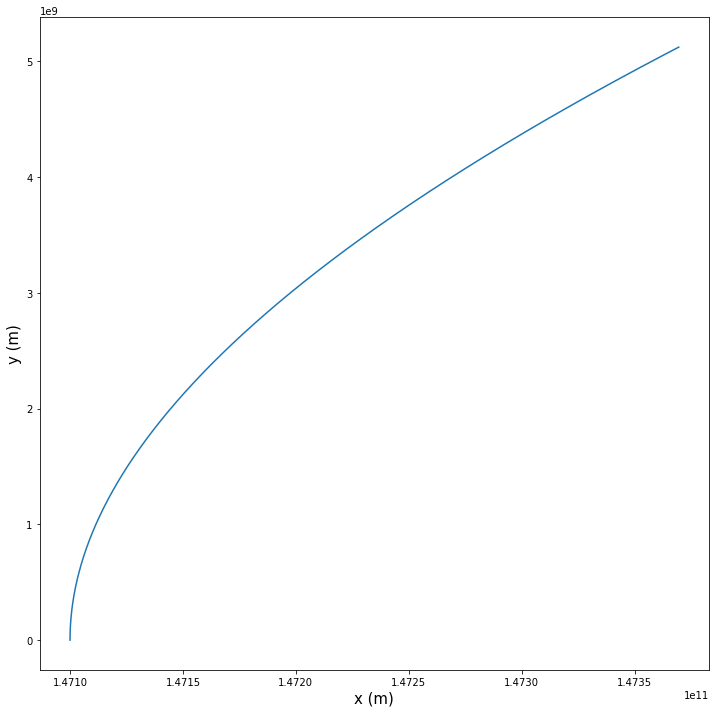

In [26]:
t_range, x_pos_list, y_pos_list, x_vel_list, y_vel_list = solving_R4(r_0, 1)

fig = plt.figure(figsize = (12, 12))

plt.xlabel('x (m)', fontsize = 15)
plt.ylabel('y (m)', fontsize = 15)

plt.plot(x_pos_list, y_pos_list)

PDE - Poisson's Equation

In [42]:
M = 100 #Grid squares on the side
V = 1.0 #Voltage at top wall
target = 1e-6 #Target accuracy
eps_0 = 1
a = 1

#Arrays for potential values
phi = np.zeros([M + 1, M + 1], float)
phi[0,:] = V
phi_prime = np.empty([M + 1, M + 1], float)

rho = np.zeros([M + 1, M + 1], float)
rho[20:40, 20:40] = -V #Charge density at negative charge
rho[60:80, 60:80] = V #Charge density at positive charge

In [47]:
#Main loop
delta = 1.0
n = 0

while delta > target and n < 500:
    for i in range(M + 1):
        for j in range(M + 1):
            if i == 0 or i == M or j == 0 or j == M:
                phi_prime[i, j] = phi[i, j]
            else:
                phi_prime[i, j] = 0.25 * (phi[i + a, j] + phi[i - a, j] + phi[i, j + a] + phi[i, j - a]) + ((np.square(a) / (4 * eps_0)) * rho[i, j]) 
                
    n += 1
                
    #Calculate max difference from old values
    delta = np.max(np.abs(phi - phi_prime))
    
    #Swap two arrays around
    phi, phi_prime = phi_prime, phi

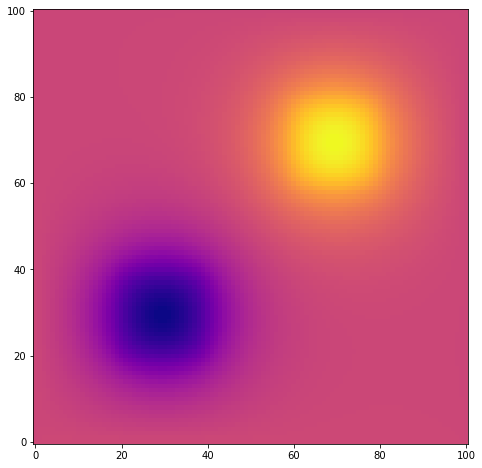

In [48]:
fig = plt.figure(figsize = (8, 8))

plt.imshow(phi, origin = 'lower', cmap = 'plasma')

Diffusion in Earth's Crust

In [48]:
#Don't want to find the steady-state solution, since there is no steady-state solution
#Firts value of spatial array changes value at different times
#Track the temperature inside as it diffuses
#Starting condition changes at different times
#Run code for 9 years and plot on 10th year for every 3 months

#Constants
tal = 365 #Days in a year
A = 10 #Celcius
B = 12 #Celcius
D = 0.1 #m^2 / day
N = 100 #Grid spacing
h = 1 #Temporal steps in time direction (1 month)
epsilon = h / 2
L = 20 #depth of crust in meters (how do we change the depth of the crust?)
a = L / N #Grid spacing

T_low = 10 #Dependent on time
T_mid = 10.5
T_high = 11 

t_1 = (10.00 * u.yr).to(u.d).value #Year 10 (January)
t_2 = (10.25 * u.yr).to(u.d).value
t_3 = (10.5 * u.yr).to(u.d).value
t_4 = (10.75 * u.yr).to(u.d).value
t_5 = (11 * u.yr).to(u.d).value
t_end = t_5 + epsilon

In [49]:
#Creating arrays
T = np.empty(N + 1, float)
T[0] = T_low
T[1:N] = T_mid
T[N] = T_high

Tp = np.empty(N + 1, float)

In [52]:
#Creating loop
t = 0.0
c = h * D/(a * a)
decadal_temp = []
labels = []

while t < t_end:
    #Calculate new values of T
    for i in range(1, N):
        T[i] = A + B * (np.sin(2.0 * np.pi * t) / tal) #Finds the initial temp
        Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i]) 
    T, Tp = Tp, T
    
    t += h
    
    if abs(t - t_1) < epsilon:
        decadal_temp.append(T)
        labels.append('January: Year 10')
    
    if abs(t - t_2) < epsilon:
        decadal_temp.append(T)
        labels.append('March')
        
    if abs(t - t_3) < epsilon:
        decadal_temp.append(T)
        labels.append('June')
            
    if abs(t - t_4) < epsilon:
        decadal_temp.append(T)
        labels.append('September')
        
    if abs(t - t_5) < epsilon:
        decadal_temp.append(T)
        labels.append('January: Year 11')

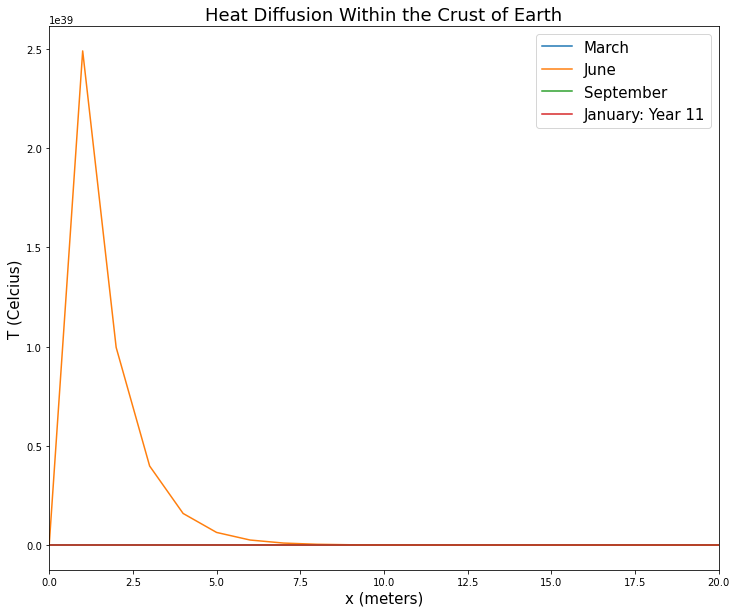

In [53]:
fig = plt.figure(figsize = (12, 10))

plt.title('Heat Diffusion Within the Crust of Earth', fontsize = 18)
plt.xlabel('x (meters)', fontsize = 15)
plt.ylabel('T (Celcius)', fontsize = 15)

plt.xlim(0, 20)

for i in range(len(decadal_temp)):
    plt.plot(decadal_temp[i], label = labels[i])
    
plt.legend(loc = 'upper right', fontsize = 15)

Exercise 12.1: Chi Squared

In [2]:
def line(x, m = 1, b = 0):
    y = (m * x) + b
    return y

In [3]:
x_vals = np.random.rand(50) #50 random points between 0 and 1

y_sigma = np.random.normal(scale = 0.2, size = 50)

y_vals = line(x_vals) + y_sigma

x_vals

array([0.13167166, 0.29969557, 0.56466845, 0.55225878, 0.54550338,
       0.76090344, 0.14489662, 0.32227469, 0.86757709, 0.78058953,
       0.83870212, 0.42860437, 0.92553577, 0.3255356 , 0.15668817,
       0.24098774, 0.34037231, 0.47712428, 0.95996752, 0.98274562,
       0.73418623, 0.39865557, 0.27311411, 0.52140789, 0.93415113,
       0.52593082, 0.95094887, 0.19421697, 0.12327559, 0.1197197 ,
       0.73815959, 0.12404804, 0.97775943, 0.32847786, 0.37006239,
       0.93985371, 0.19647371, 0.68033904, 0.38493367, 0.68910889,
       0.00445218, 0.09510391, 0.02769073, 0.4141505 , 0.0816558 ,
       0.46529362, 0.83767765, 0.86649294, 0.68541805, 0.26623707])

In [5]:
#using polyfit
std_dev = 0.2

params, error_matrix = np.polyfit(x_vals, y_vals, 2, w = 1/y_sigma, cov = True)

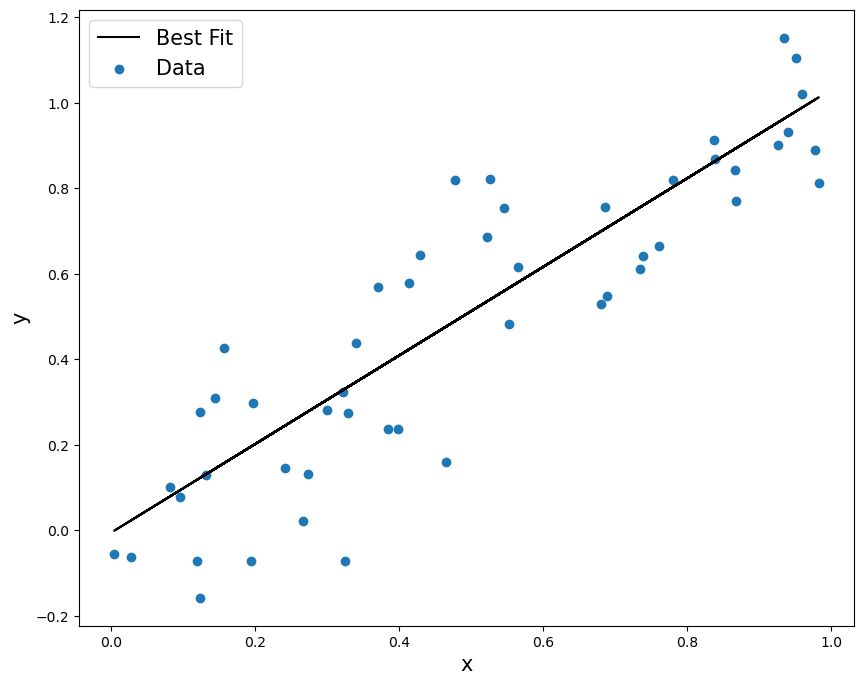

In [6]:
fig = plt.figure(figsize = (10, 8))

plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)

plt.scatter(x_vals, y_vals, label = 'Data')
plt.plot(x_vals, line(x_vals, m = params[1], b = params[2]), color = 'black', label = 'Best Fit')

plt.legend(loc = 'upper left', fontsize = 15)

In [7]:
slope = params[1]

slope

1.0364192160240966

In [27]:
fit_params = []

for i in range(30):
    #Generating random values
    x_vals = np.random.rand(50) #50 random points between 0 and 1
    y_sigma = np.random.normal(scale = 0.2, size = 50)
    y_vals = line(x_vals) + y_sigma

    #Fitting with polyfit
    params, error_matrix = np.polyfit(x_vals, y_vals, 2, w = 1/y_sigma, cov = True)

    #Adding params to arrays
    fit_params.append(params[1]) #Distribution of slopes

(array([1., 0., 2., 3., 1., 3., 5., 3., 4., 2., 2., 0., 2., 0., 2.]),
 array([0.83069761, 0.85411474, 0.87753187, 0.900949  , 0.92436613,
        0.94778326, 0.97120039, 0.99461752, 1.01803465, 1.04145178,
        1.06486891, 1.08828604, 1.11170317, 1.1351203 , 1.15853743,
        1.18195456]),
 <BarContainer object of 15 artists>)

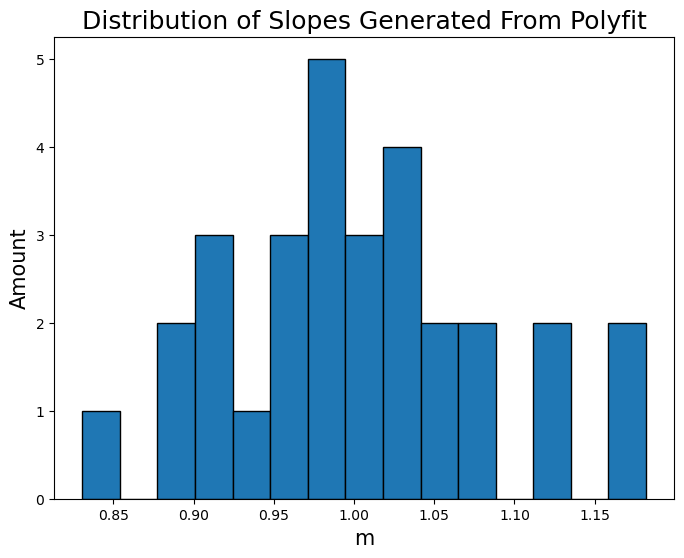

In [9]:
fig = plt.figure(figsize = (8, 6))

plt.title('Distribution of Slopes Generated From Polyfit', fontsize = 18)

plt.xlabel('m', fontsize = 15)
plt.ylabel('Amount', fontsize = 15)

plt.hist(fit_params, bins=15, edgecolor='black')

Ex. 12.3: Bootstrap Resampling

In [24]:
rand_array = np.random.randint(0, len(x_vals), size = len(x_vals))

new_x_vals = []
new_y_vals = []

for r in range(len(rand_array)):
    new_x_vals.append(x_vals[r])
    new_y_vals.append(y_vals[r])

In [29]:
params, error_matrix = np.polyfit(new_x_vals, new_y_vals, 2, w = 1/y_sigma, cov = True)

print(f"Slope = {params[1]}")

Slope = 1.0407263815696388


Machine Learning Example

In [2]:
df = sns.load_dataset('planets')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


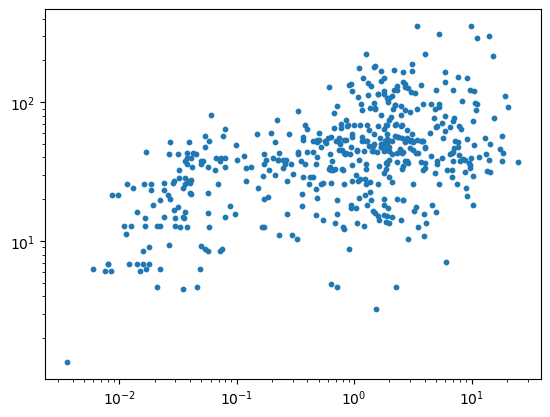

In [9]:
plt.scatter(np.array(df['mass']), np.array(df['distance']), s = 10)
plt.xscale('log')
plt.yscale('log')

In [36]:
#Split targets into training/testing sets
df = df.dropna()

x = np.array([np.log(df.mass.values)]).T
y = np.log(df.distance.values)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [37]:
#Create linear regression model
regr = linear_model.LinearRegression()

In [38]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(398, 1) (100, 1) (398,) (100,)


In [39]:
#Train model using the training sets
regr.fit(x_train, y_train);